## perceptron

In [1]:
from sklearn.datasets import load_iris

iris = load_iris()
idx = np.in1d(iris.target, [0, 2])
idx

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [2]:
X = iris.data[idx, :2]
X

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6],
       [5.4, 3.9],
       [4.6, 3.4],
       [5. , 3.4],
       [4.4, 2.9],
       [4.9, 3.1],
       [5.4, 3.7],
       [4.8, 3.4],
       [4.8, 3. ],
       [4.3, 3. ],
       [5.8, 4. ],
       [5.7, 4.4],
       [5.4, 3.9],
       [5.1, 3.5],
       [5.7, 3.8],
       [5.1, 3.8],
       [5.4, 3.4],
       [5.1, 3.7],
       [4.6, 3.6],
       [5.1, 3.3],
       [4.8, 3.4],
       [5. , 3. ],
       [5. , 3.4],
       [5.2, 3.5],
       [5.2, 3.4],
       [4.7, 3.2],
       [4.8, 3.1],
       [5.4, 3.4],
       [5.2, 4.1],
       [5.5, 4.2],
       [4.9, 3.1],
       [5. , 3.2],
       [5.5, 3.5],
       [4.9, 3.6],
       [4.4, 3. ],
       [5.1, 3.4],
       [5. , 3.5],
       [4.5, 2.3],
       [4.4, 3.2],
       [5. , 3.5],
       [5.1, 3.8],
       [4.8, 3. ],
       [5.1, 3.8],
       [4.6, 3.2],
       [5.3, 3.7],
       [5. , 3.3],
       [6.3, 3.3],
       [5.8, 2.7],
       [7.1,

In [3]:
y = (iris.target[idx] / 2).astype(np.int)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [5]:
from sklearn.linear_model import Perceptron

In [6]:
model = Perceptron(max_iter=300, shuffle=False, tol=0, n_iter_no_change=1e9).fit(X, y)
model

Perceptron(max_iter=300, n_iter_no_change=1000000000.0, shuffle=False, tol=0)

In [7]:
XX_min = X[:, 0].min() - 1
XX_max = X[:, 0].max() + 1
YY_min = X[:, 1].min() - 1
YY_max = X[:, 1].max() + 1

In [8]:
XX_min, XX_max, YY_min, YY_max

(3.3, 8.9, 1.2000000000000002, 5.4)

In [10]:
XX, YY = np.meshgrid(np.linspace(XX_min, XX_max, 1000),
                    np.linspace(YY_min, YY_max, 1000))                     

In [13]:
XX.shape, YY.shape

((1000, 1000), (1000, 1000))

In [14]:
ZZ = model.predict(np.c_[XX.ravel(), YY.ravel()]).reshape(XX.shape)
ZZ

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [15]:
ZZ.shape

(1000, 1000)

In [16]:
np.c_[XX.ravel(), YY.ravel()]

array([[3.3       , 1.2       ],
       [3.30560561, 1.2       ],
       [3.31121121, 1.2       ],
       ...,
       [8.88878879, 5.4       ],
       [8.89439439, 5.4       ],
       [8.9       , 5.4       ]])

In [17]:
test_XX = XX[:5]
test_YY = YY[:5]
test_c = np.c_[test_XX.ravel(), test_YY.ravel()]
test_c

array([[3.3       , 1.2       ],
       [3.30560561, 1.2       ],
       [3.31121121, 1.2       ],
       ...,
       [8.88878879, 1.21681682],
       [8.89439439, 1.21681682],
       [8.9       , 1.21681682]])

In [18]:
test_XX

array([[3.3       , 3.30560561, 3.31121121, ..., 8.88878879, 8.89439439,
        8.9       ],
       [3.3       , 3.30560561, 3.31121121, ..., 8.88878879, 8.89439439,
        8.9       ],
       [3.3       , 3.30560561, 3.31121121, ..., 8.88878879, 8.89439439,
        8.9       ],
       [3.3       , 3.30560561, 3.31121121, ..., 8.88878879, 8.89439439,
        8.9       ],
       [3.3       , 3.30560561, 3.31121121, ..., 8.88878879, 8.89439439,
        8.9       ]])

In [19]:
test_YY

array([[1.2       , 1.2       , 1.2       , ..., 1.2       , 1.2       ,
        1.2       ],
       [1.2042042 , 1.2042042 , 1.2042042 , ..., 1.2042042 , 1.2042042 ,
        1.2042042 ],
       [1.20840841, 1.20840841, 1.20840841, ..., 1.20840841, 1.20840841,
        1.20840841],
       [1.21261261, 1.21261261, 1.21261261, ..., 1.21261261, 1.21261261,
        1.21261261],
       [1.21681682, 1.21681682, 1.21681682, ..., 1.21681682, 1.21681682,
        1.21681682]])

In [20]:
%matplotlib inline

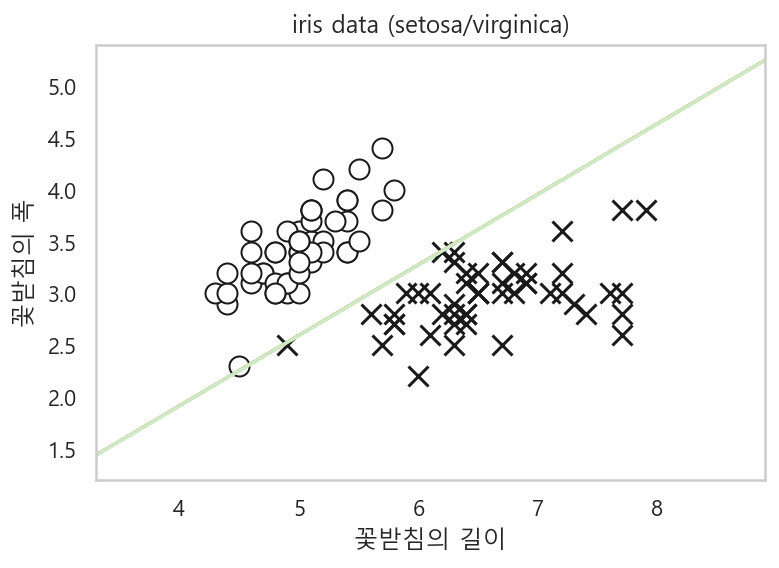

In [21]:
plt.contour(XX, YY, ZZ, cmap=mpl.cm.Set3)
plt.scatter(X[y==0, 0], X[y==0, 1], c="w", s=100, marker="o", edgecolor="k")
plt.scatter(X[y==1, 0], X[y==1, 1], c="k", s=100, marker="x", edgecolor="k")
plt.xlabel("꽃받침의 길이")
plt.ylabel("꽃받침의 폭")
plt.title("iris data (setosa/virginica)")
plt.xlim(XX_min, XX_max)
plt.ylim(YY_min, YY_max)
plt.grid(False)
plt.show() ; 

In [27]:
def plot_perceptron(n) : 
    
    model = Perceptron(max_iter=300, shuffle=False, tol=0, n_iter_no_change=1e9).fit(X, y)
    XX_min = X[:, 0].min() - 1
    XX_max = X[:, 0].max() + 1
    YY_min = X[:, 1].min() - 1
    YY_max = X[:, 1].max() + 1
    XX, YY = np.meshgrid(np.linspace(XX_min, XX_max, 1000),
                        np.linspace(YY_min, YY_max, 1000))
    ZZ = model.predict(np.c_[XX.ravel(), YY.ravel()]).reshape(XX.shape)
    
    plt.contour(XX, YY, ZZ, cmap=mpl.cm.YlGn)
    plt.scatter(X[y==0, 0], X[y==0, 1], c="w", s=100, marker="o", edgecolor="k")
    plt.scatter(X[y==1, 0], X[y==1, 1], c="k", s=100, marker="x", edgecolor="k")
    plt.xlabel("sepal length")
    plt.ylabel("sepal width")
    plt.title("iris data (setosa / virginica)")
    plt.xlim(XX_min, XX_max)
    plt.ylim(YY_min, YY_max)
    plt.grid(False)
    plt.show()

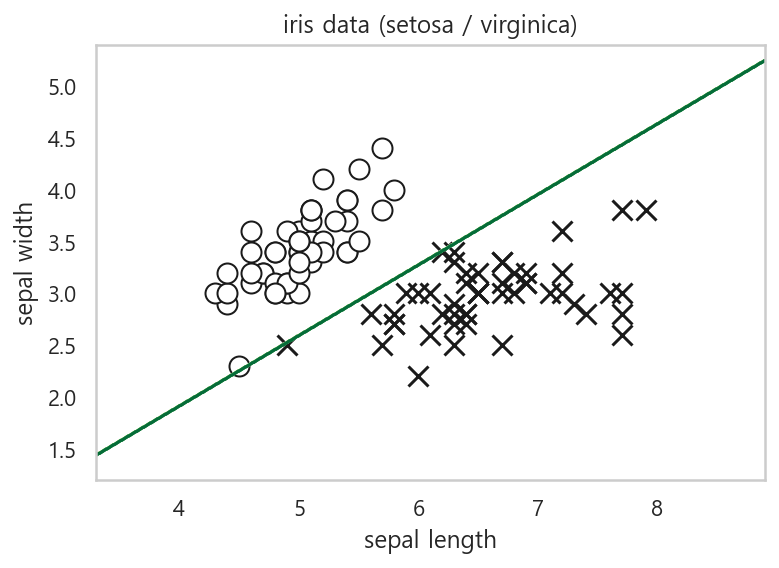

<function __main__.plot_perceptron(n)>

In [28]:
from ipywidgets import widgets
widgets.interact(plot_perceptron, n=widgets.IntSlider(min=1, max=100, step=1, value=1))

In [29]:
from sklearn.metrics import confusion_matrix, classification_report

In [31]:
model = Perceptron(max_iter=400, shuffle=False, tol=0, n_iter_no_change=1e9).fit(X, y)
confusion_matrix(y, model.predict(X))

array([[50,  0],
       [ 0, 50]], dtype=int64)

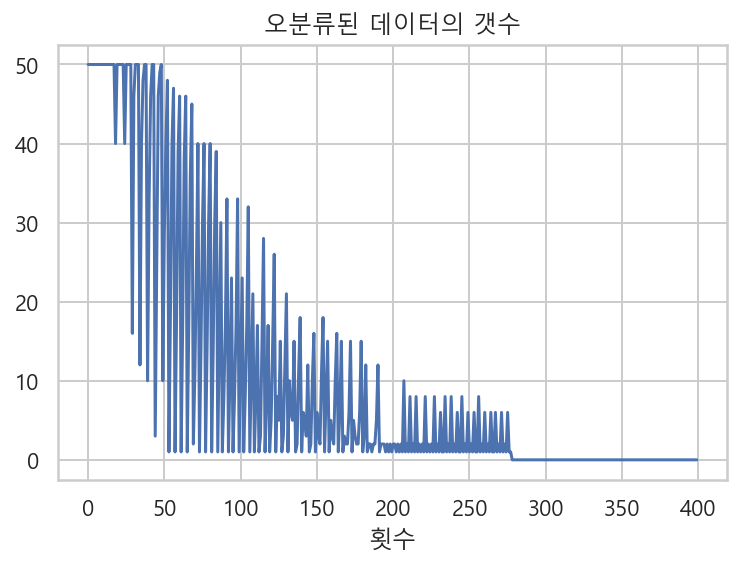

In [32]:
n = 400
loss = np.zeros(n)
model = Perceptron(warm_start=True, shuffle=False)

for i in range(n) : 
    model.partial_fit(X, y, classes=[0, 1])
    loss[i] = np.sum(y != model.predict(X))
    
plt.plot(loss)
plt.xlabel("횟수")
plt.title("오분류된 데이터의 갯수")
plt.show() ; 

In [33]:
loss

array([50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50.,
       50., 50., 50., 50., 50., 40., 50., 50., 50., 50., 50., 40., 50.,
       50., 50., 50., 16., 46., 50., 50., 50., 12., 40., 48., 50., 50.,
       10., 33., 46., 50., 50.,  3., 24., 46., 49., 50., 10., 29., 40.,
       48.,  1., 19., 40., 47.,  1., 18., 39., 46.,  1., 17., 38., 46.,
        1., 17., 36., 45.,  2., 11., 24., 40.,  1., 14., 30., 40.,  1.,
       14., 30., 40.,  1., 14., 30., 39.,  1., 15., 30.,  1.,  8., 17.,
       33.,  1., 11., 23.,  1.,  8., 17., 33.,  1., 12., 23.,  1.,  8.,
       17., 32.,  1., 11., 21.,  1.,  8., 17.,  1.,  3., 15., 28.,  1.,
        8., 17.,  1.,  5., 15., 26.,  1.,  8.,  5., 15.,  1.,  3., 12.,
       21.,  1., 10.,  6.,  5., 15.,  1.,  2., 11., 18.,  1.,  6.,  5.,
        3., 12.,  1.,  2., 10., 16.,  1.,  6.,  3.,  2., 11., 18.,  1.,
        8., 15.,  1.,  5.,  3.,  2., 10., 16.,  1.,  6., 15.,  1.,  3.,
        2.,  2.,  6., 15.,  1.,  5.,  3.,  2.,  2.,  6., 15.,  1

In [1]:
%matplotlib inline

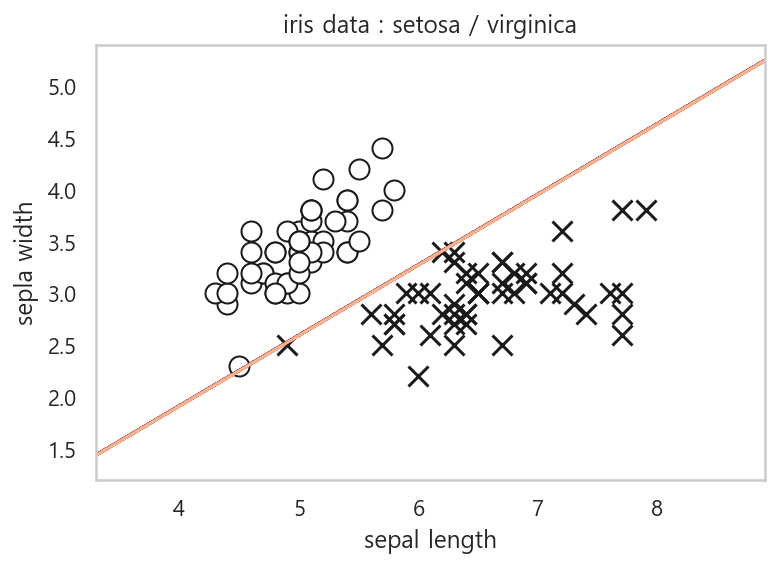

In [10]:
from sklearn.datasets import load_iris

iris = load_iris()
idx = np.in1d(iris.target, [0, 2])
X = iris.data[idx, :2]
y = (iris.target[idx] / 2).astype(np.int)

from sklearn.linear_model import Perceptron

def plot_perceptron(n) : 
    
    model = Perceptron(max_iter=300, shuffle=False, tol=0, n_iter_no_change=1e9).fit(X, y)
    XX_min = X[:, 0].min() - 1
    XX_max = X[:, 0].max() + 1
    YY_min = X[:, 1].min() - 1
    YY_max = X[:, 1].max() + 1
    XX, YY = np.meshgrid(np.linspace(XX_min, XX_max, 1000),
                        np.linspace(YY_min, YY_max, 1000))
    ZZ = model.predict(np.c_[XX.ravel(), YY.ravel()]).reshape(XX.shape)
    
    plt.contour(XX, YY, ZZ)
    plt.scatter(X[y==0, 0], X[y==0, 1], c="w", s=100, marker="o", edgecolor="k")
    plt.scatter(X[y==1, 0], X[y==1, 1], c="k", s=100, marker="x", edgecolor="k")
    plt.xlabel("sepal length")
    plt.ylabel("sepla width")
    plt.title("iris data : setosa / virginica")
    plt.grid(False)
    plt.show()
    
from ipywidgets import widgets

widgets.interact(plot_perceptron, n=widgets.IntSlider(min=1, max=100, step=1, value=1)) ; 

In [11]:
from sklearn.metrics import classification_report, confusion_matrix

In [12]:
model = Perceptron(max_iter=400, shuffle=False, tol=0, n_iter_no_change=1e9).fit(X, y)
confusion_matrix(y, model.predict(X))

array([[50,  0],
       [ 0, 50]], dtype=int64)

In [14]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [13]:
model.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

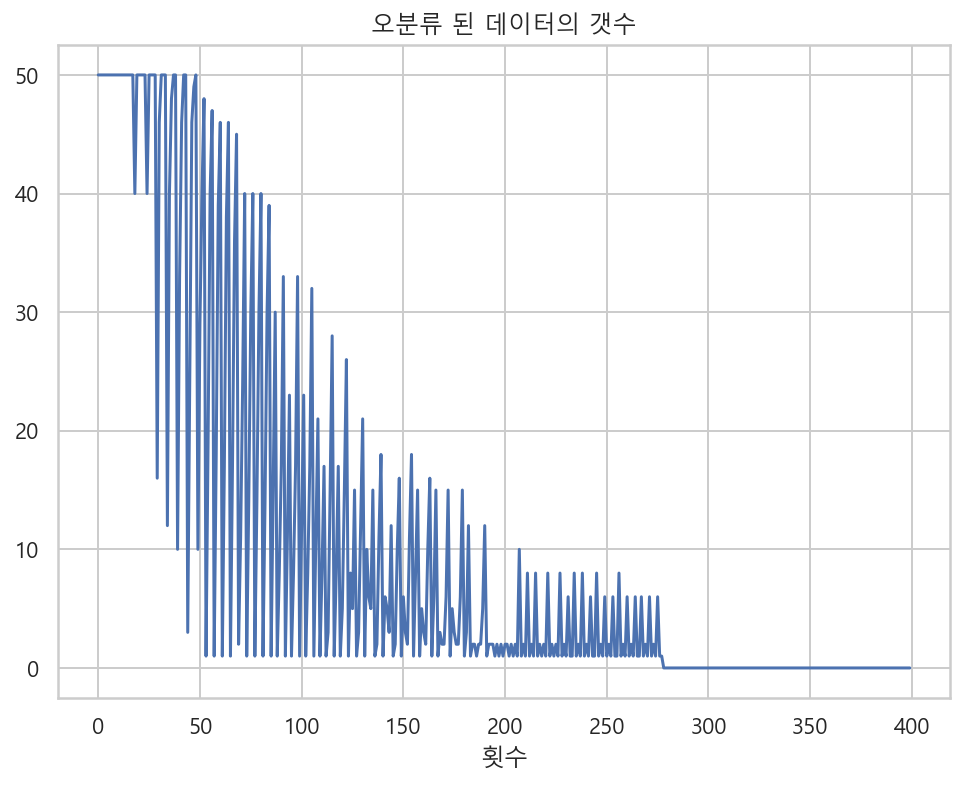

In [16]:
n = 400
loss = np.zeros(n)
model = Perceptron(warm_start=True, shuffle=False)
for i in range(n) : 
    model.partial_fit(X, y, classes=[0, 1])
    loss[i] = np.sum(y != model.predict(X))

plt.figure(figsize=(8, 6))
plt.plot(loss)
plt.xlabel("횟수")
plt.title("오분류 된 데이터의 갯수")
plt.show() ; 

In [19]:
len(loss), loss.min(), loss.max(), loss.mean()

(400, 0.0, 50.0, 10.4675)

In [21]:
loss[:100]

array([50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50.,
       50., 50., 50., 50., 50., 40., 50., 50., 50., 50., 50., 40., 50.,
       50., 50., 50., 16., 46., 50., 50., 50., 12., 40., 48., 50., 50.,
       10., 33., 46., 50., 50.,  3., 24., 46., 49., 50., 10., 29., 40.,
       48.,  1., 19., 40., 47.,  1., 18., 39., 46.,  1., 17., 38., 46.,
        1., 17., 36., 45.,  2., 11., 24., 40.,  1., 14., 30., 40.,  1.,
       14., 30., 40.,  1., 14., 30., 39.,  1., 15., 30.,  1.,  8., 17.,
       33.,  1., 11., 23.,  1.,  8., 17., 33.,  1.])

In [28]:
def modified_huber_loss(y_true, y_pred) : 
    
    z = y_pred * y_true
    loss = -4 * z
    loss[z >= -1] = (1 - z[z >= -1]) ** 2
    loss[z >= 1.] = 0
    
    return loss

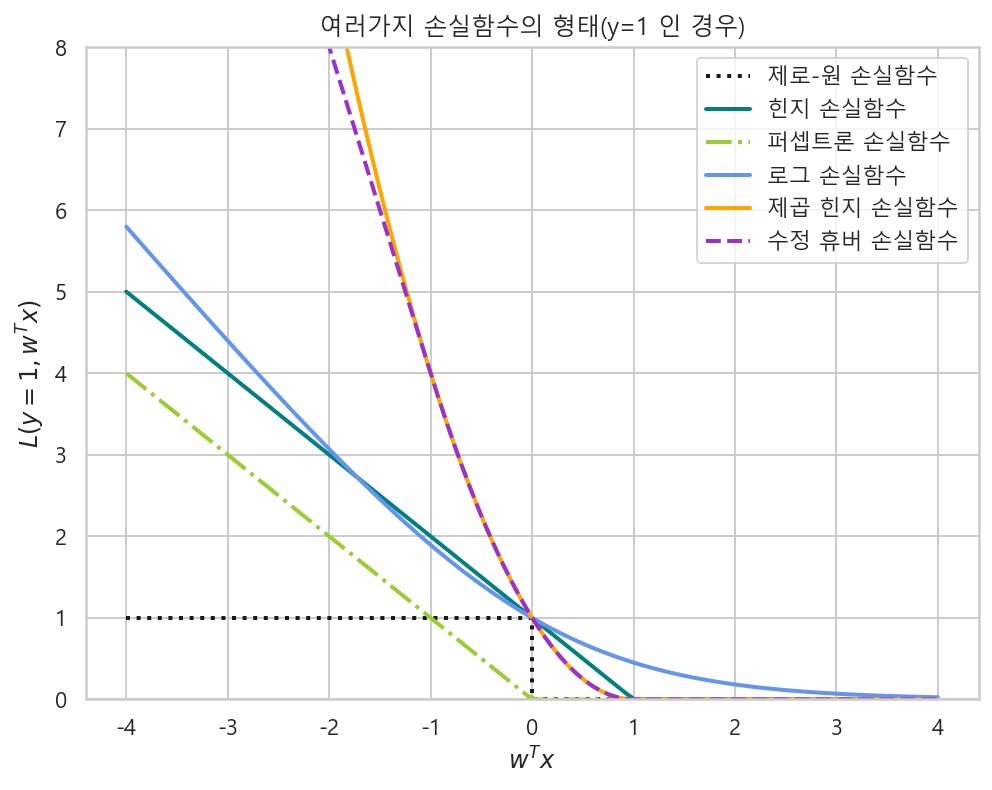

In [30]:
xmin, xmax = -4, 4
xx = np.linspace(xmin, xmax, 100)

plt.figure(figsize=(8, 6))
plt.plot([xmin, 0, 0, xmax], [1, 1, 0, 0], color="k", lw=2, ls=":", label="제로-원 손실함수")
plt.plot(xx, np.where(xx < 1, 1 - xx, 0), color="teal", lw=2, ls="-", label="힌지 손실함수")
plt.plot(xx, -np.minimum(xx, 0), color="yellowgreen", lw=2, ls="-.", label="퍼셉트론 손실함수")
plt.plot(xx, np.log2(1 + np.exp(-xx)), color="cornflowerblue", lw=2, label="로그 손실함수")
plt.plot(xx, np.where(xx < 1, 1 - xx, 0) ** 2, color="orange", lw=2, label="제곱 힌지 손실함수")
plt.plot(xx, modified_huber_loss(xx, 1), color="darkorchid", lw=2, ls="--", label="수정 휴버 손실함수")
plt.xlabel(r"$w^Tx$")
plt.ylabel(r"$L(y=1, w^Tx)$")
plt.title("여러가지 손실함수의 형태(y=1 인 경우)")
plt.ylim((0, 8))
plt.legend(loc="upper right")
plt.show() ; 

## SGD

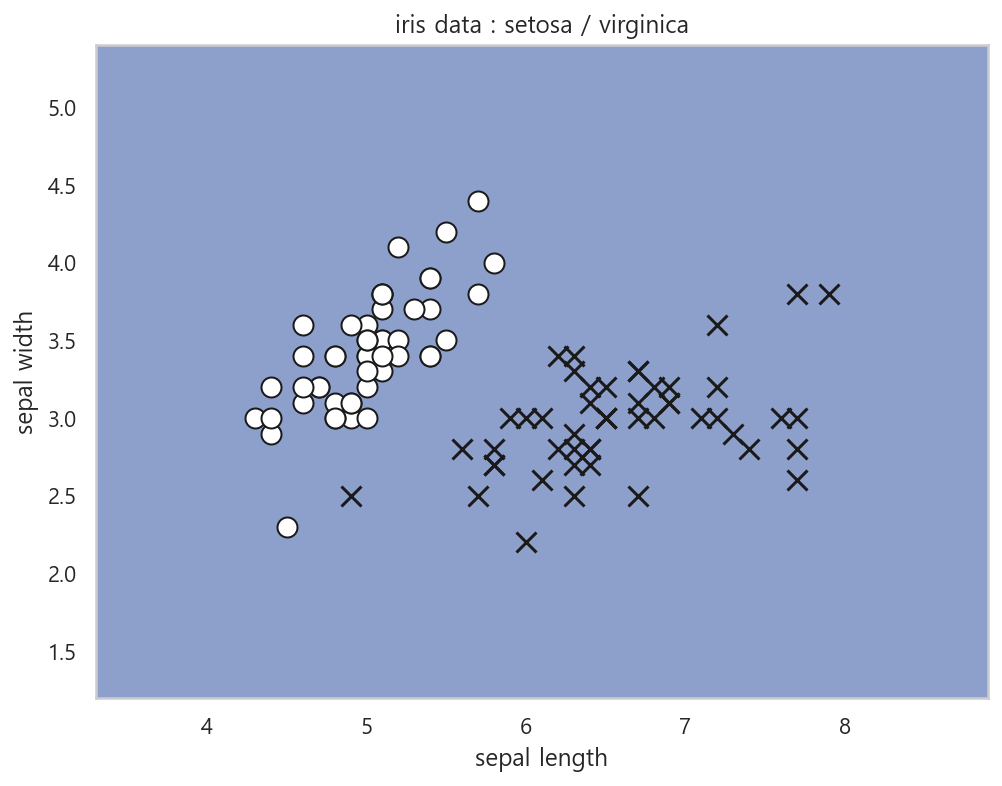

In [44]:
from sklearn.linear_model import SGDClassifier

def plot_sgd(n) : 
    
    model = SGDClassifier(loss="modified_huber", max_iter=n, shuffle=False, 
                         n_iter_no_change=1e9).fit(X, y)
    XX_min = X[:, 0].min() - 1
    XX_max = X[:, 0].max() + 1
    YY_min = X[:, 1].min() - 1
    YY_max = X[:, 1].max() + 1
    XX, YY = np.meshgrid(np.linspace(XX_min, XX_max, 1000),
                        np.linspace(YY_min, YY_max, 1000))
    ZZ = model.predict(np.c_[XX.ravel(), YY.ravel()]).reshape(XX.shape)
    cmap = mpl.colors.ListedColormap(sns.color_palette("Set2"))
    plt.figure(figsize=(8, 6))
    plt.contourf(XX, YY, ZZ, cmap=cmap)
    plt.scatter(X[y==0, 0], X[y==0, 1], c="w", s=100, marker="o", edgecolor="k")
    plt.scatter(X[y==1, 0], X[y==1, 1], c="k", s=100, marker="x", edgecolor="k")
    plt.xlabel("sepal length")
    plt.ylabel("sepal width")
    plt.title("iris data : setosa / virginica")
    plt.xlim(XX_min, XX_max)
    plt.ylim(YY_min, YY_max)
    plt.grid(False)
    plt.show() ; 
    
from ipywidgets import widgets
widgets.interact(plot_sgd, n=widgets.IntSlider(min=1, max=100, step=1, value=1)) ; 

In [46]:
model = SGDClassifier(loss="modified_huber", max_iter=400, shuffle=False, n_iter_no_change=1e9).fit(X, y)
confusion_matrix(y, model.predict(X))

array([[50,  0],
       [ 0, 50]], dtype=int64)

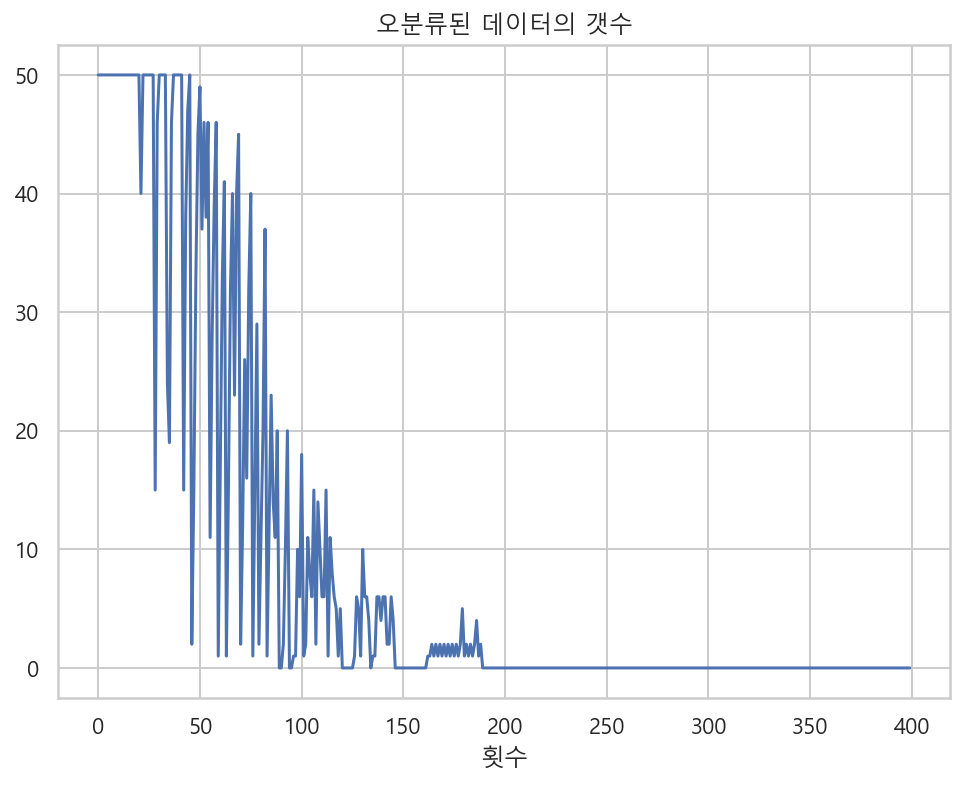

In [47]:
n = 400
loss = np.empty(n)
model = SGDClassifier(loss="modified_huber", shuffle=False)
for i in range(n) : 
    model.partial_fit(X, y, classes=[0, 1])
    loss[i] = np.sum(y != model.predict(X))
    
plt.figure(figsize=(8, 6))
plt.plot(loss)
plt.xlabel("횟수")
plt.title("오분류된 데이터의 갯수")
plt.show() ; 

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [53]:
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=13)
model_perceptron = Perceptron(max_iter=600, shuffle=False, n_iter_no_change=1e9, tol=0).fit(X_train, y_train)

y_pred_perceptron = model_perceptron.predict(X_test)

print("perceptron acc : {}".format(accuracy_score(y_test, y_pred_perceptron)))

perceptron acc : 0.9333333333333333


In [58]:
model_sgd = SGDClassifier(loss="modified_huber", max_iter=1000, n_iter_no_change=1e9).fit(X_train, y_train)

y_pred_sgd = model_sgd.predict(X_test)

print("sgd acc : {}".format(accuracy_score(y_test, y_pred_sgd)))

sgd acc : 0.9666666666666667


In [60]:
dir(SGDClassifier)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_allocate_parameter_mem',
 '_check_feature_names',
 '_check_n_features',
 '_check_proba',
 '_estimator_type',
 '_fit',
 '_fit_binary',
 '_fit_multiclass',
 '_get_learning_rate_type',
 '_get_loss_function',
 '_get_param_names',
 '_get_penalty_type',
 '_get_tags',
 '_make_validation_score_cb',
 '_make_validation_split',
 '_more_tags',
 '_partial_fit',
 '_predict_proba_lr',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_validate_data',
 '_validate_params',
 'decision_function',
 'densify',
 'fit',
 'get_params',
 'loss_functions',
 'parti

In [62]:
SGDClassifier.loss_functions

{'hinge': (sklearn.linear_model._sgd_fast.Hinge, 1.0),
 'squared_hinge': (sklearn.linear_model._sgd_fast.SquaredHinge, 1.0),
 'perceptron': (sklearn.linear_model._sgd_fast.Hinge, 0.0),
 'log': (sklearn.linear_model._sgd_fast.Log,),
 'modified_huber': (sklearn.linear_model._sgd_fast.ModifiedHuber,),
 'squared_error': (sklearn.linear_model._sgd_fast.SquaredLoss,),
 'squared_loss': (sklearn.linear_model._sgd_fast.SquaredLoss,),
 'huber': (sklearn.linear_model._sgd_fast.Huber, 0.1),
 'epsilon_insensitive': (sklearn.linear_model._sgd_fast.EpsilonInsensitive,
  0.1),
 'squared_epsilon_insensitive': (sklearn.linear_model._sgd_fast.SquaredEpsilonInsensitive,
  0.1)}

In [92]:
model_sgd = SGDClassifier(loss="hinge", max_iter=1000, n_iter_no_change=1e9).fit(X_train, y_train)

y_pred_sgd = model_sgd.predict(X_test)

print(str(model_sgd._get_loss_function).split("(")[1].split(",")[0])
print("sgd acc : {}".format(accuracy_score(y_test, y_pred_sgd)))

n_iter_no_change=1000000000.0)>
sgd acc : 0.9333333333333333


In [91]:
model_sgd = SGDClassifier(loss="squared_hinge", max_iter=1000, n_iter_no_change=1e9).fit(X_train, y_train)

y_pred_sgd = model_sgd.predict(X_test)

print(str(model_sgd._get_loss_function).split("(")[1].split(",")[0])
print("sgd acc : {}".format(accuracy_score(y_test, y_pred_sgd)))

loss='squared_hinge'
sgd acc : 0.9666666666666667


In [90]:
model_sgd = SGDClassifier(loss="log", max_iter=1000, n_iter_no_change=1e9).fit(X_train, y_train)

y_pred_sgd = model_sgd.predict(X_test)

print(str(model_sgd._get_loss_function).split("(")[1].split(",")[0])
print("sgd acc : {}".format(accuracy_score(y_test, y_pred_sgd)))

loss='log'
sgd acc : 0.8666666666666667


In [89]:
model_sgd = SGDClassifier(loss="squared_error", max_iter=1000, n_iter_no_change=1e9).fit(X_train, y_train)

y_pred_sgd = model_sgd.predict(X_test)

print(str(model_sgd._get_loss_function).split("(")[1].split(",")[0])
print("sgd acc : {}".format(accuracy_score(y_test, y_pred_sgd)))

loss='squared_error'
sgd acc : 0.7333333333333333


In [88]:
model_sgd = SGDClassifier(loss="squared_loss", max_iter=1000, n_iter_no_change=1e9).fit(X_train, y_train)

y_pred_sgd = model_sgd.predict(X_test)

print(str(model_sgd._get_loss_function).split("(")[1].split(",")[0])
print("sgd acc : {}".format(accuracy_score(y_test, y_pred_sgd)))

loss='squared_loss'
sgd acc : 0.4


In [85]:
model_sgd = SGDClassifier(loss="huber", max_iter=1000, n_iter_no_change=1e9).fit(X_train, y_train)

y_pred_sgd = model_sgd.predict(X_test)

print(str(model_sgd._get_loss_function).split("(")[1].split(",")[0])
print("sgd acc : {}".format(accuracy_score(y_test, y_pred_sgd)))

loss='huber'
sgd acc : 0.7666666666666667


In [86]:
model_sgd = SGDClassifier(loss="epsilon_insensitive", max_iter=1000, n_iter_no_change=1e9).fit(X_train, y_train)

y_pred_sgd = model_sgd.predict(X_test)

print(str(model_sgd._get_loss_function).split("(")[1].split(",")[0])
print("sgd acc : {}".format(accuracy_score(y_test, y_pred_sgd)))

loss='epsilon_insensitive'
sgd acc : 0.43333333333333335


In [87]:
model_sgd = SGDClassifier(loss="squared_epsilon_insensitive", max_iter=1000, n_iter_no_change=1e9).fit(X_train, y_train)

y_pred_sgd = model_sgd.predict(X_test)

print(str(model_sgd._get_loss_function).split("(")[1].split(",")[0])
print("sgd acc : {}".format(accuracy_score(y_test, y_pred_sgd)))

loss='squared_epsilon_insensitive'
sgd acc : 0.26666666666666666
